## Análise de Variância

### Análise Geral

In [55]:
Sys.setlocale(category = "LC_ALL", locale = "en_US.UTF-8")  # Set to UTF-8

tab <- read.csv(file = './DoE/DoE - Results v5.csv', sep = ",", dec = ".")
head(tab)

[1] "en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/C"

,OrdemPad,OrdemEns,N,cv,rho,p,algorithm,Cost,SL,Smax,Smin
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,470,1,5,0.25,0.7,0.00,NM,103489.4,99.09423,"[1399.2144498433697, 1658.7649880363933, 1042.2330337527308, 747.286206980608, 1686.2127523827885]","[1201.4368902951483, 914.7239732900387, 639.5877517955154, 739.3379748244363, 435.15644577269865]"
2,395,2,20,0.25,0.9,0.15,GA,169395.4,99.50613,"[19.15, 647.49, 517.56, 565.54, 956.18, 150.72, 443.71, 73.75, 523.08, 44.31, 554.91, 74.34, 809.63, 502.19, 967.79, 18.21, 549.7, 341.57, 687.08, 151.83]","[10.583031607135657, 44.2029800442084, 136.92541039273365, 176.64457358768658, 277.0562906936106, 48.365424121307846, 232.78495368895355, 59.374898694891755, 424.3185167241786, 7.319402773613951, 208.68809481402238, 18.429985859764233, 221.15276951405482, 381.10128269346194, 827.5365250944916, 15.602061856873165, 359.1462459790723, 181.74173366025565, 368.7313376464325, 111.89870556980519]"
3,376,3,20,0.25,0.8,0.00,ACO,160969.9,98.73199,"[270.0, 215.0, 635.0, 545.0, 520.0, 330.0, 610.0, 165.0, 370.0, 230.0, 850.0, 115.0, 190.0, 140.0, 135.0, 680.0, 855.0, 95.0, 115.0, 690.0]","[60.0, 155.0, 560.0, 490.0, 510.0, 280.0, 185.0, 20.0, 125.0, 205.0, 390.0, 40.0, 85.0, 40.0, 45.0, 295.0, 370.0, 30.0, 15.0, 0.0]"
4,312,4,10,0.50,0.8,0.15,ACO,100176.4,99.33048,"[365.0, 455.0, 715.0, 155.0, 255.0, 325.0, 555.0, 380.0, 950.0, 100.0]","[175.0, 260.0, 585.0, 125.0, 75.0, 155.0, 285.0, 235.0, 500.0, 5.0]"
5,968,5,10,0.50,0.9,0.05,ACO,105675.8,99.66967,"[825.0, 490.0, 935.0, 635.0, 860.0, 865.0, 395.0, 215.0, 205.0, 275.0]","[435.0, 120.0, 655.0, 345.0, 770.0, 395.0, 145.0, 105.0, 80.0, 40.0]"
6,64,6,20,0.25,0.9,0.00,ACO,178758.1,99.56368,"[700.0, 105.0, 155.0, 515.0, 250.0, 300.0, 535.0, 245.0, 220.0, 925.0, 400.0, 300.0, 265.0, 790.0, 720.0, 890.0, 840.0, 420.0, 445.0, 585.0]","[535.0, 15.0, 35.0, 85.0, 75.0, 60.0, 370.0, 135.0, 90.0, 350.0, 60.0, 105.0, 245.0, 475.0, 75.0, 385.0, 680.0, 195.0, 275.0, 540.0]"


In [26]:
tail(tab)

,OrdemPad,OrdemEns,N,cv,rho,p,algorithm,Cost,SL,Smax,Smin
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>
967,150,967,5,0.25,0.7,0.05,NM,146411.27,94.76612,"[2081.696287352196, 692.2200176203171, 883.5899791301026, 383.44384544539867, 970.6781012950337]","[1985.073938382285, 692.2200176203171, 883.5899791301026, 99.13374665101199, 60.41459691896456]"
968,10,968,20,0.10,0.7,0.15,NM,147620.44,99.49673,"[522.1581438643319, 626.3858739734093, 602.7834085626347, 174.33548385050358, 285.79187753971155, 626.2621504786356, 600.8494044369281, 301.8398120358238, 505.3993694097696, 426.56051829846706, 481.59526049863405, 299.309134979282, 566.6765501367299, 381.1400129720522, 460.3287665652773, 478.1067352142434, 433.89324729579266, 585.4446537668547, 276.2970190010569, 122.0496550744125]","[300.4129473509819, 388.14126418324133, 380.885299535369, 45.19262307440778, 118.15127091594593, 266.33067159141245, 199.17785246579808, 242.73244324062603, 253.04319690378676, 225.87593537799017, 351.8585134132162, 175.9877240157704, 346.8252795156371, 222.38197372150302, 315.789506898642, 271.4404498294191, 201.8139687156074, 341.7734989037983, 90.08758583186822, 110.87683190240398]"
969,524,969,5,0.50,0.8,0.05,ACO,87810.44,97.56296,"[760.0, 555.0, 930.0, 390.0, 670.0]","[320.0, 480.0, 795.0, 120.0, 625.0]"
970,732,970,20,0.50,0.7,0.15,ACO,189504.25,99.10609,"[850.0, 980.0, 395.0, 895.0, 730.0, 595.0, 180.0, 565.0, 360.0, 415.0, 165.0, 450.0, 100.0, 390.0, 790.0, 25.0, 445.0, 745.0, 600.0, 660.0]","[730.0, 440.0, 245.0, 620.0, 205.0, 235.0, 60.0, 5.0, 350.0, 200.0, 70.0, 210.0, 30.0, 225.0, 305.0, 5.0, 365.0, 140.0, 575.0, 210.0]"
971,533,971,5,0.50,0.9,0.05,RD,72704.11,98.59768,"[626.815373219432, 650.0275943192765, 295.9688559551046, 588.5687620590339, 489.4700102797587]","[375.2813604669635, 499.8713089386083, 145.83365724630758, 249.1920488660982, 373.6842176921874]"
972,972,972,10,0.50,0.9,0.15,ACO,115019.27,99.50890,"[890.0, 610.0, 595.0, 285.0, 765.0, 980.0, 420.0, 860.0, 200.0, 130.0]","[415.0, 490.0, 390.0, 115.0, 385.0, 120.0, 280.0, 560.0, 50.0, 50.0]"


In [27]:
TIC<-tab$Cost
alg<-factor(tab$algorithm)
n<-factor(tab$N)
cv<-factor(tab$cv)
rho<-factor(tab$rho)
p<-factor(tab$p)

In [28]:
av<-aov(TIC~n*cv*rho*p*alg)
summary(av)

                Df    Sum Sq   Mean Sq  F value   Pr(>F)    
n                2 5.722e+11 2.861e+11 2124.843  < 2e-16 ***
cv               2 5.406e+08 2.703e+08    2.008  0.13516    
rho              2 1.878e+11 9.389e+10  697.284  < 2e-16 ***
p                2 1.568e+09 7.839e+08    5.822  0.00312 ** 
alg              3 7.368e+10 2.456e+10  182.396  < 2e-16 ***
n:cv             4 1.308e+10 3.270e+09   24.286  < 2e-16 ***
n:rho            4 2.148e+11 5.370e+10  398.808  < 2e-16 ***
cv:rho           4 4.769e+09 1.192e+09    8.855 5.78e-07 ***
n:p              4 3.781e+09 9.453e+08    7.020 1.55e-05 ***
cv:p             4 2.496e+08 6.240e+07    0.463  0.76260    
rho:p            4 1.177e+09 2.942e+08    2.185  0.06924 .  
n:alg            6 1.231e+10 2.051e+09   15.231 2.30e-16 ***
cv:alg           6 1.583e+09 2.639e+08    1.960  0.06929 .  
rho:alg          6 1.595e+10 2.658e+09   19.738  < 2e-16 ***
p:alg            6 1.219e+09 2.032e+08    1.509  0.17247    
n:cv:rho         8 8.866

In [29]:
av<-aov(TIC~n+cv+rho+p+alg+n:cv+n:rho+n:p+n:alg+cv:rho+cv:p+cv:alg+rho:p+rho:alg+p:alg)
summary(av)

             Df    Sum Sq   Mean Sq  F value   Pr(>F)    
n             2 5.722e+11 2.861e+11 1697.925  < 2e-16 ***
cv            2 5.406e+08 2.703e+08    1.604 0.201623    
rho           2 1.878e+11 9.389e+10  557.188  < 2e-16 ***
p             2 1.568e+09 7.839e+08    4.652 0.009770 ** 
alg           3 7.368e+10 2.456e+10  145.750  < 2e-16 ***
n:cv          4 1.308e+10 3.270e+09   19.406 2.45e-15 ***
n:rho         4 2.148e+11 5.370e+10  318.681  < 2e-16 ***
n:p           4 3.781e+09 9.453e+08    5.610 0.000184 ***
n:alg         6 1.231e+10 2.051e+09   12.171 3.38e-13 ***
cv:rho        4 4.769e+09 1.192e+09    7.076 1.31e-05 ***
cv:p          4 2.496e+08 6.240e+07    0.370 0.829880    
cv:alg        6 1.583e+09 2.639e+08    1.566 0.153916    
rho:p         4 1.177e+09 2.942e+08    1.746 0.137820    
rho:alg       6 1.595e+10 2.658e+09   15.773  < 2e-16 ***
p:alg         6 1.219e+09 2.032e+08    1.206 0.300744    
Residuals   912 1.537e+11 1.685e+08                      
---
Signif. co

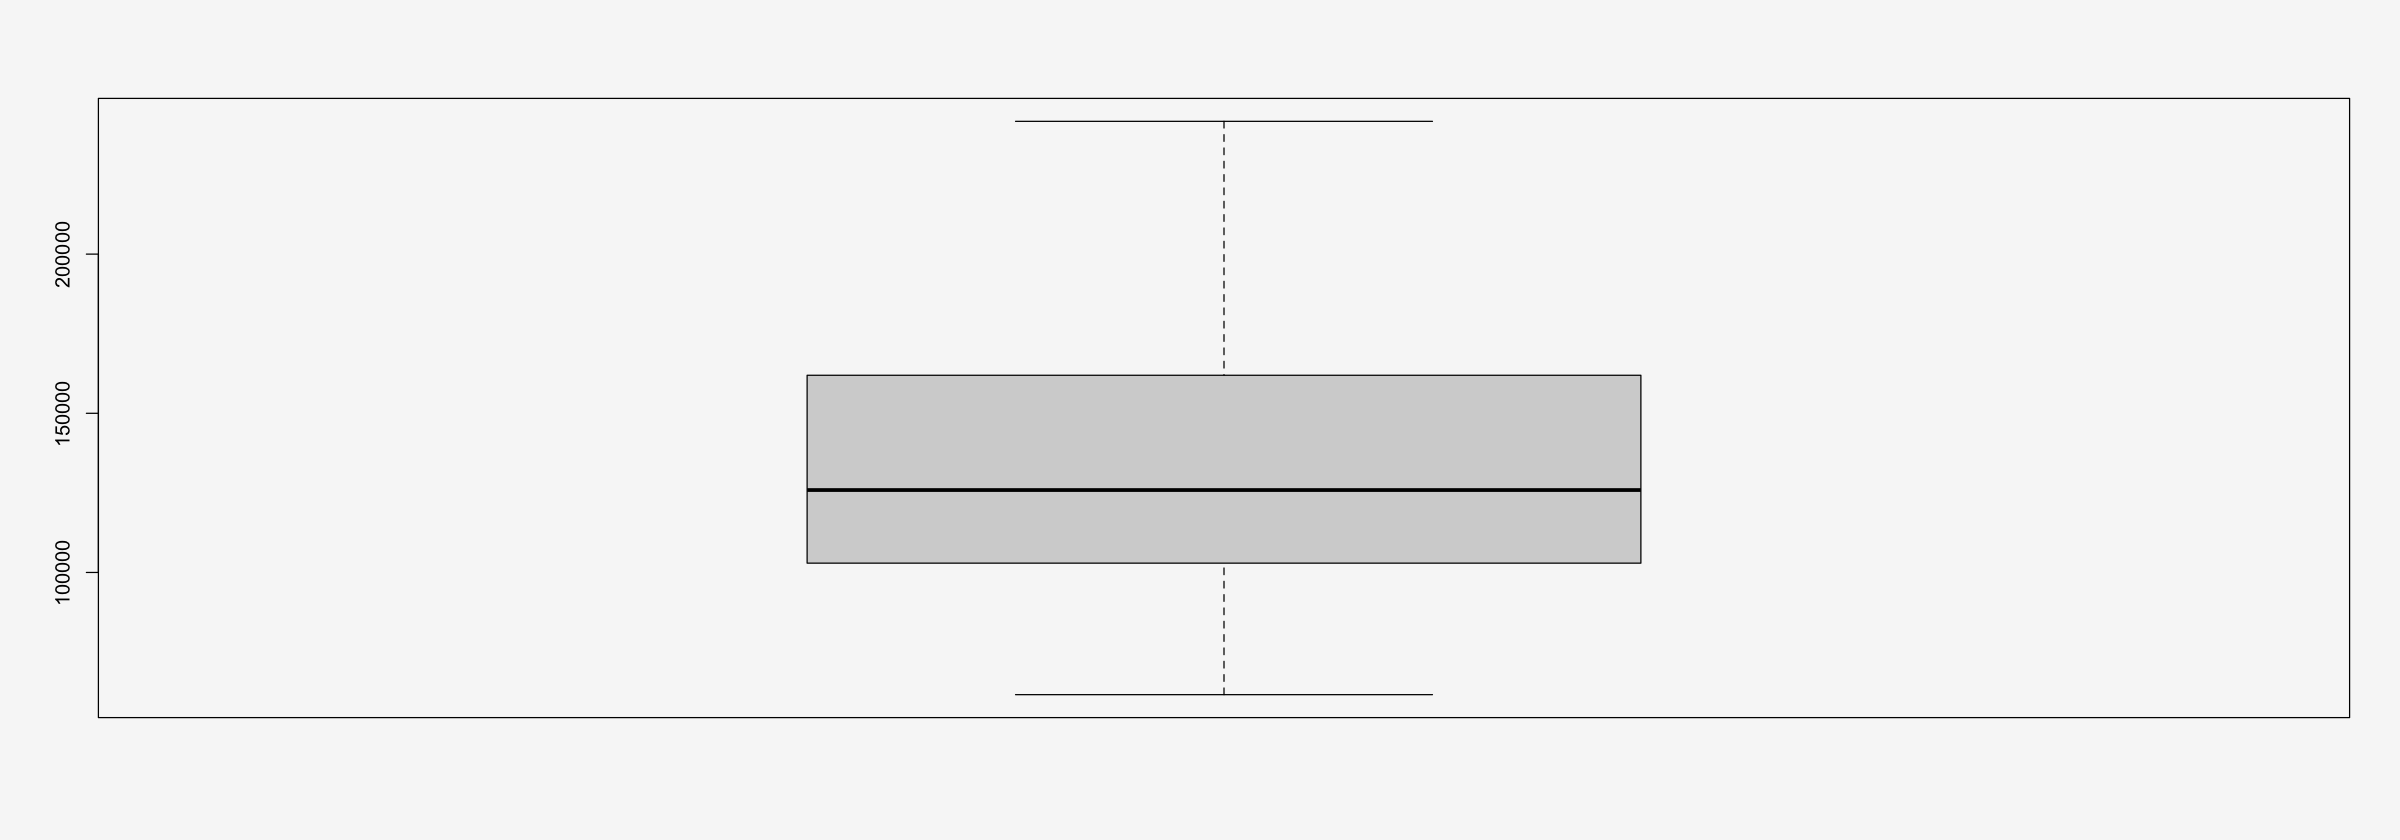

In [30]:
# Light gray background color
par(bg = "#f7f7f7")
boxplot(TIC)


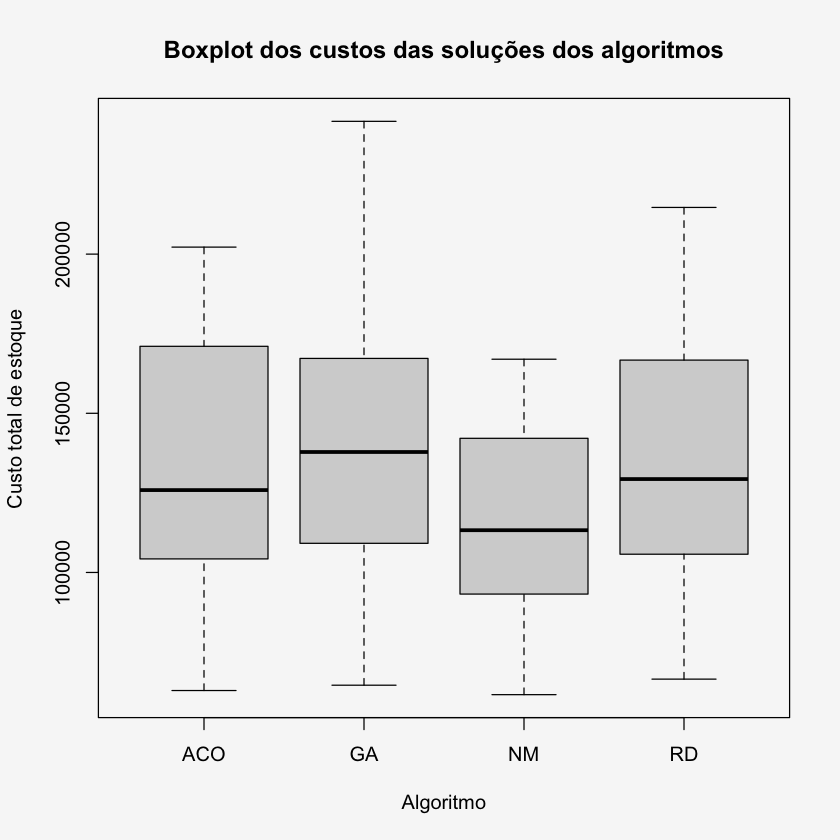

In [56]:
# Light gray background color
par(bg = "#f7f7f7")
# Add labels to the axes
xlabel <- "Algoritmo"
ylabel <- "Custo total de estoque"
title <- "Boxplot dos custos das soluções dos algoritmos"

boxplot(TIC~alg, xlab = xlabel, ylab = ylabel, main = title)



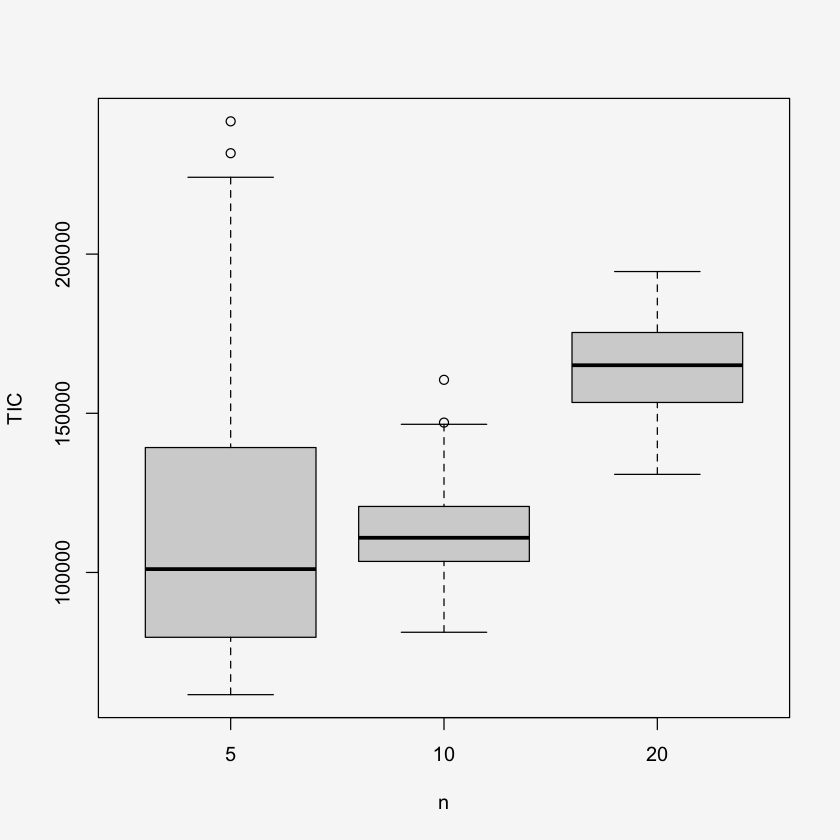

In [57]:
# Light gray background color
par(bg = "#f7f7f7")
boxplot(TIC~n)

In [33]:
# Light gray background color
par(bg = "#f7f7f7")
options(repr.plot.width=10)

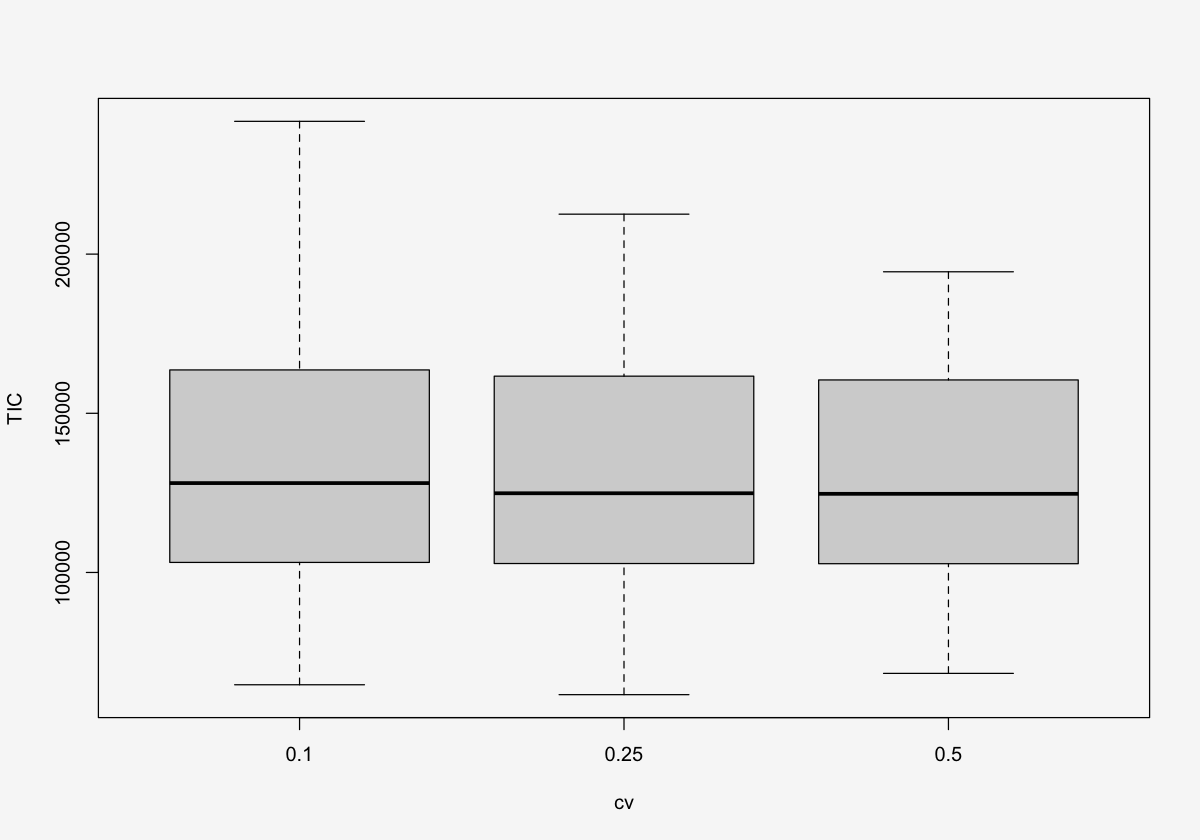

In [34]:
# Light gray background color
par(bg = "#f7f7f7")
boxplot(TIC~cv)

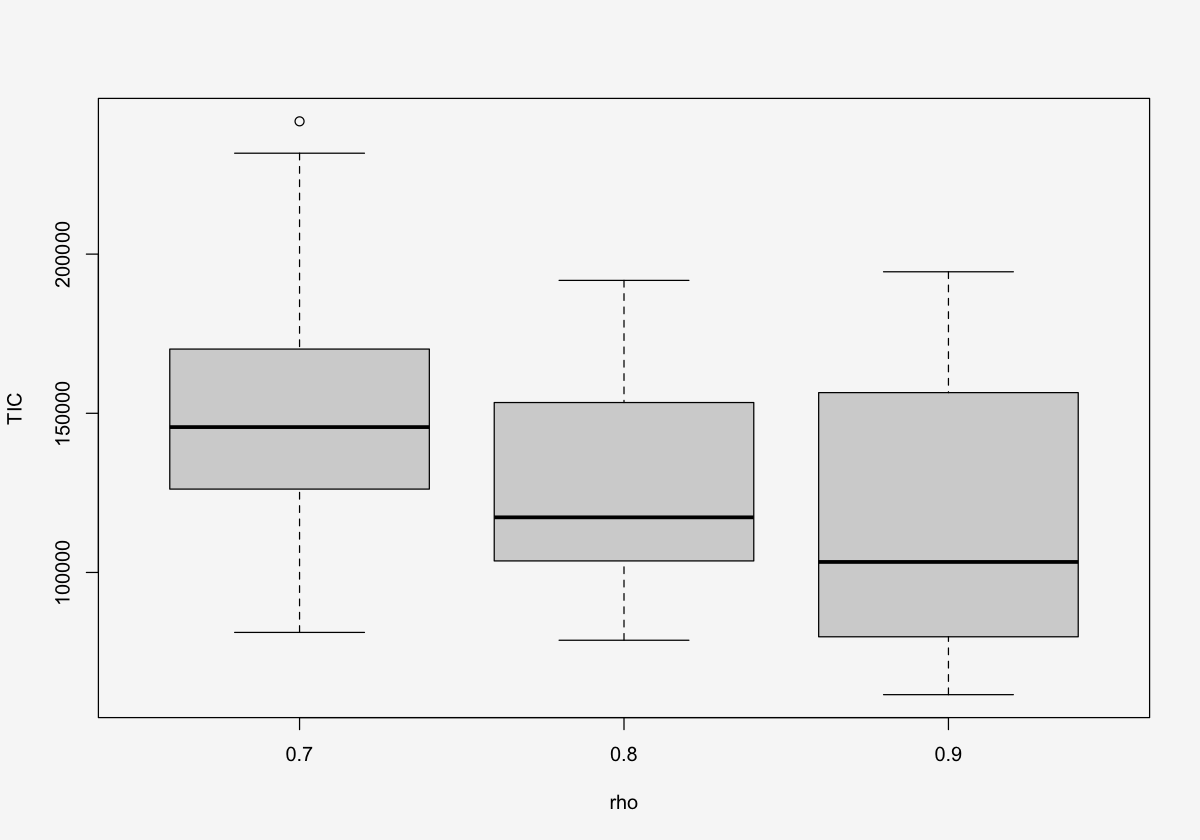

In [35]:
# Light gray background color
par(bg = "#f7f7f7")
boxplot(TIC~rho)

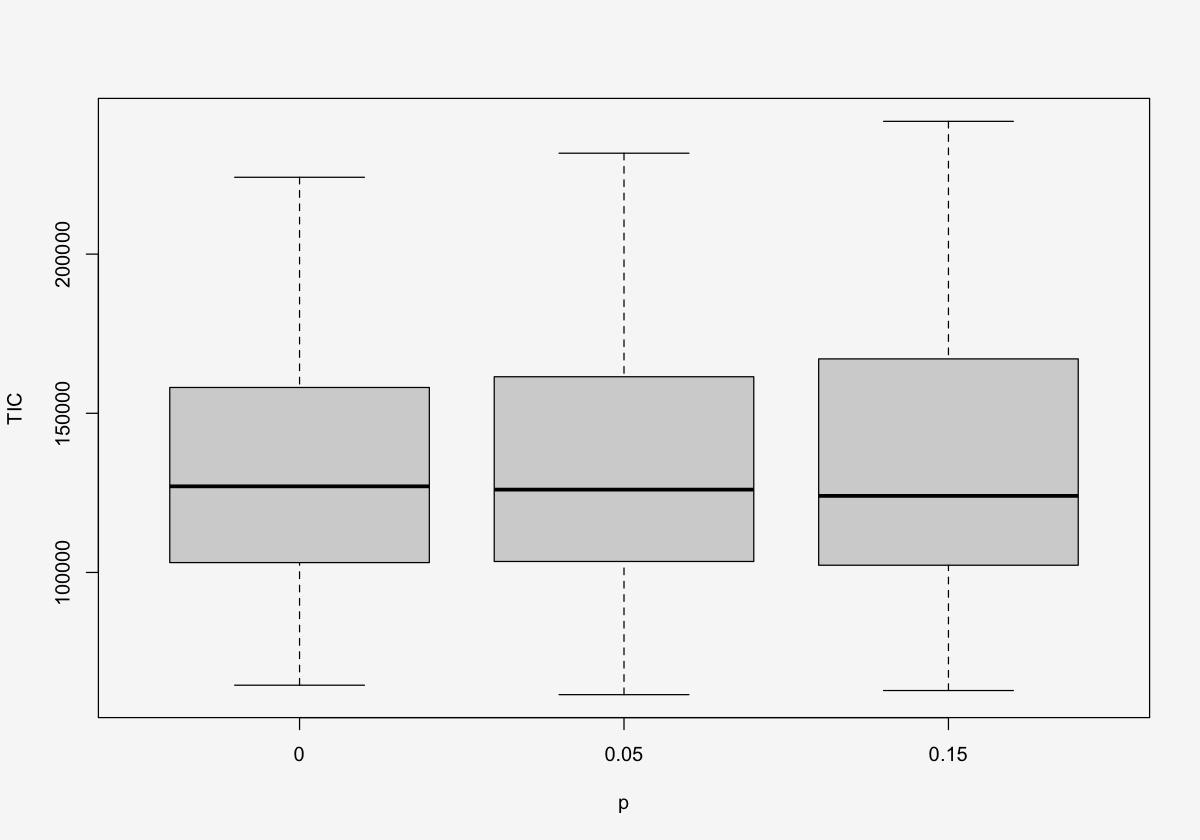

In [36]:
# Light gray background color
par(bg = "#f7f7f7")
boxplot(TIC~p)

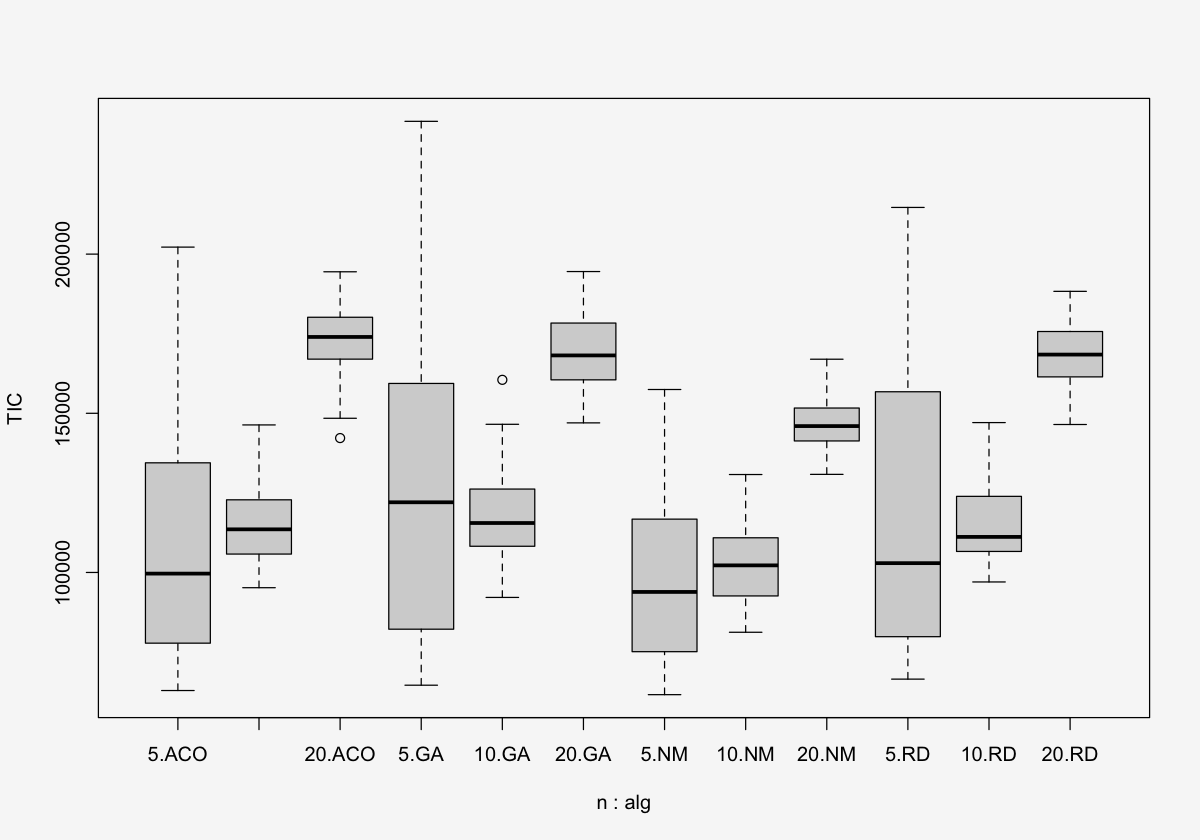

In [37]:
# Light gray background color
par(bg = "#f7f7f7")
boxplot(TIC~n*alg)

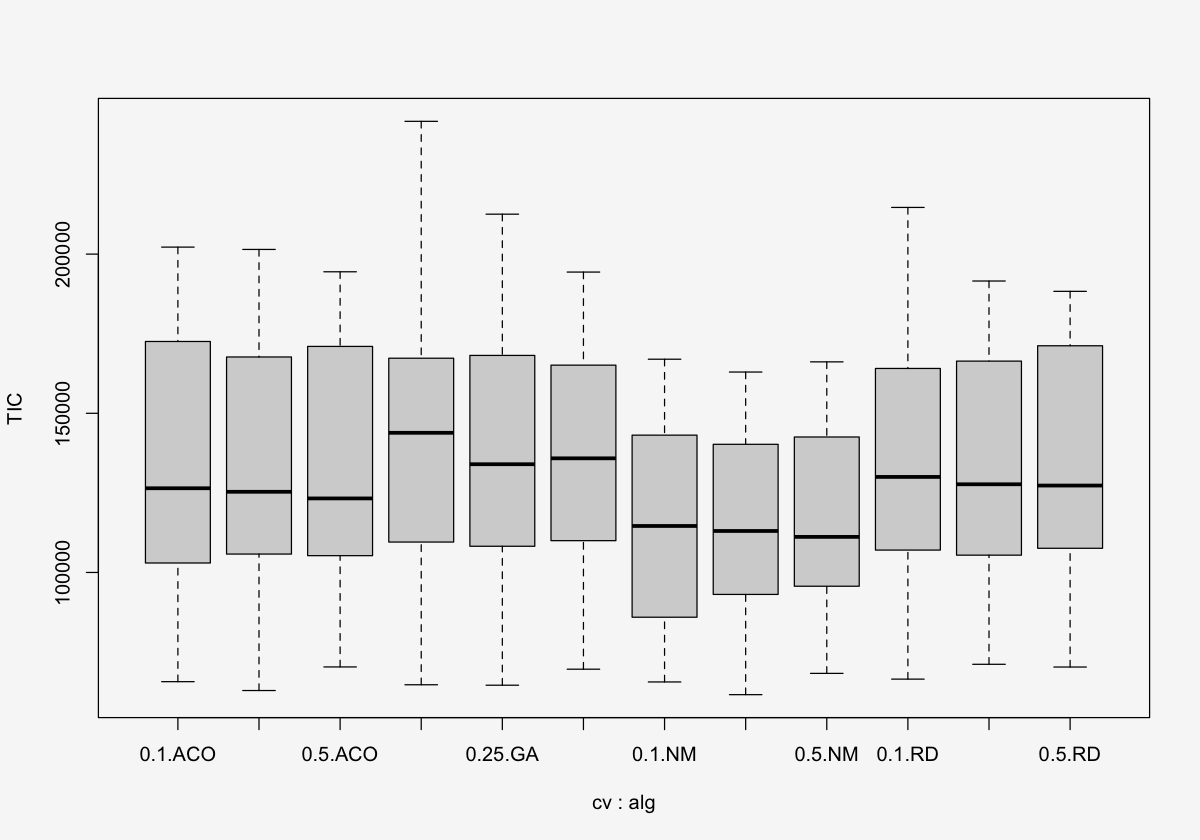

In [38]:
# Light gray background color
par(bg = "#f7f7f7")
boxplot(TIC~cv*alg)

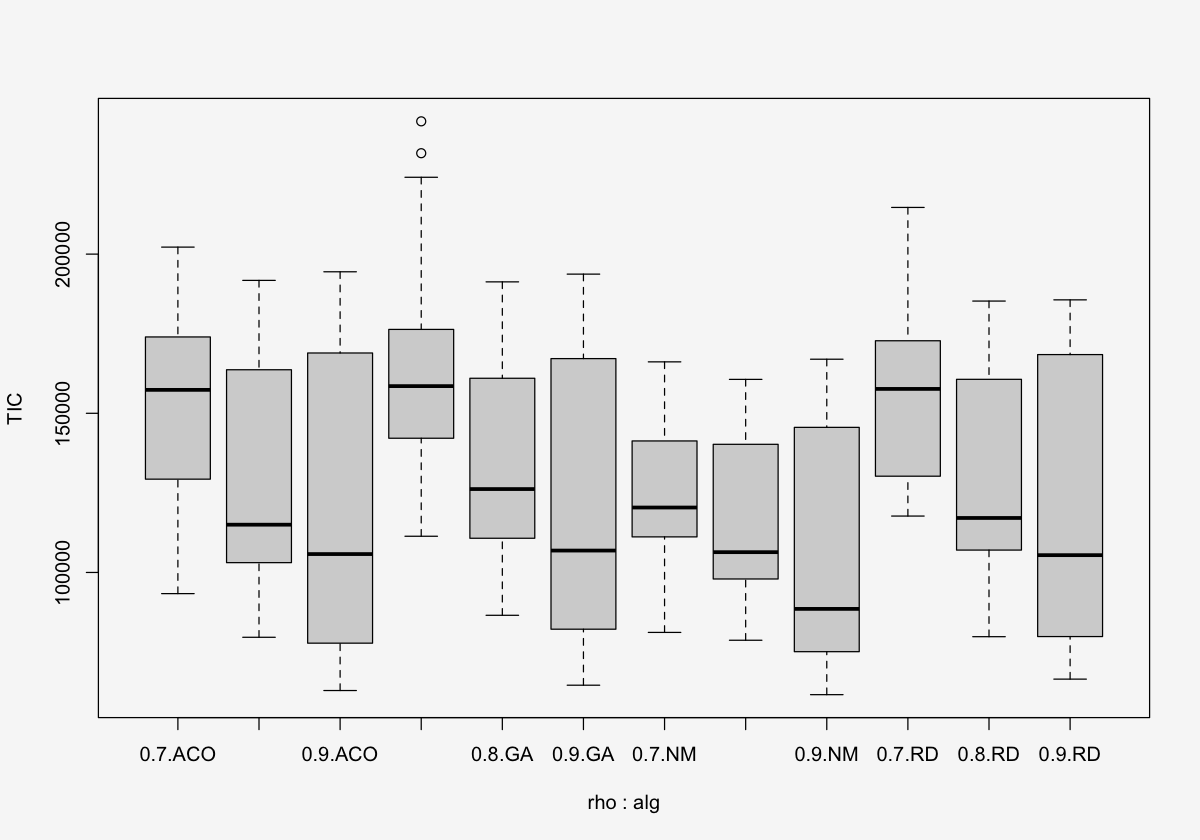

In [39]:
# Light gray background color
par(bg = "#f7f7f7")
boxplot(TIC~rho*alg)

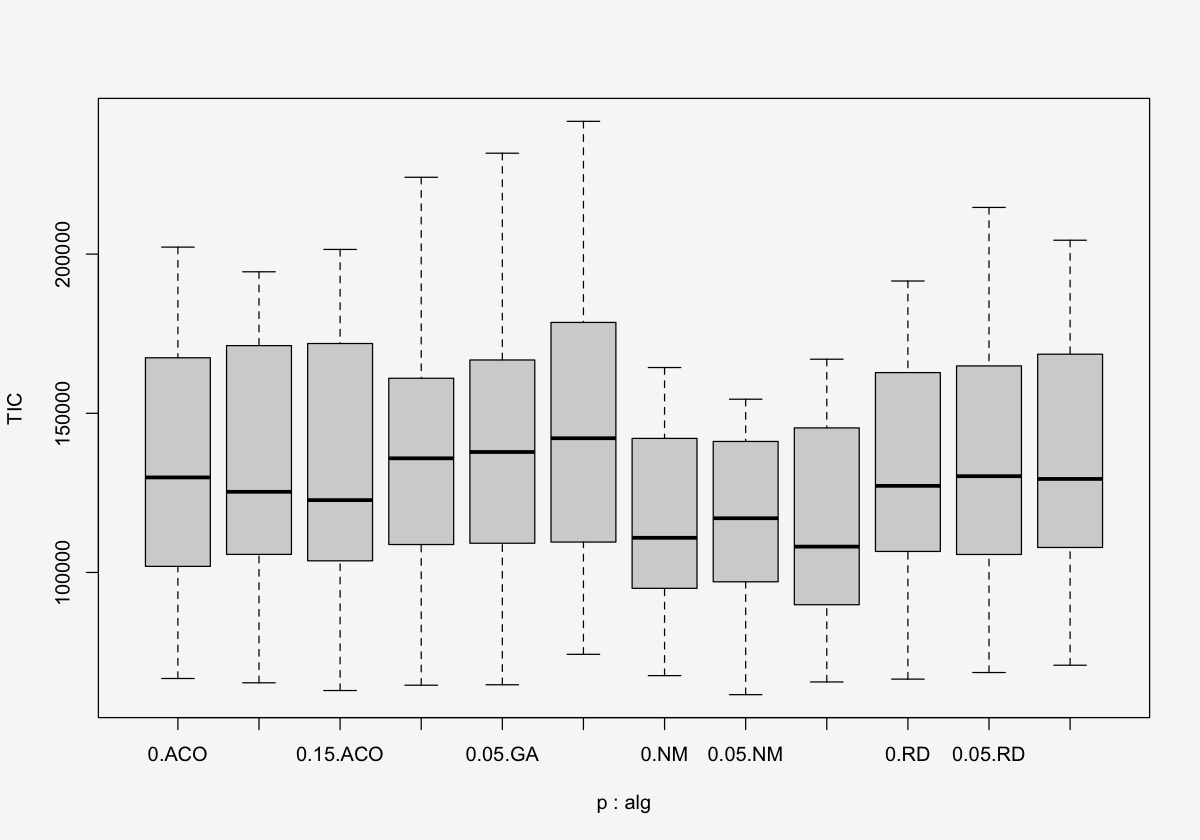

In [40]:
# Light gray background color
par(bg = "#f7f7f7")
boxplot(TIC~p*alg)

In [41]:
options(repr.plot.width=20)

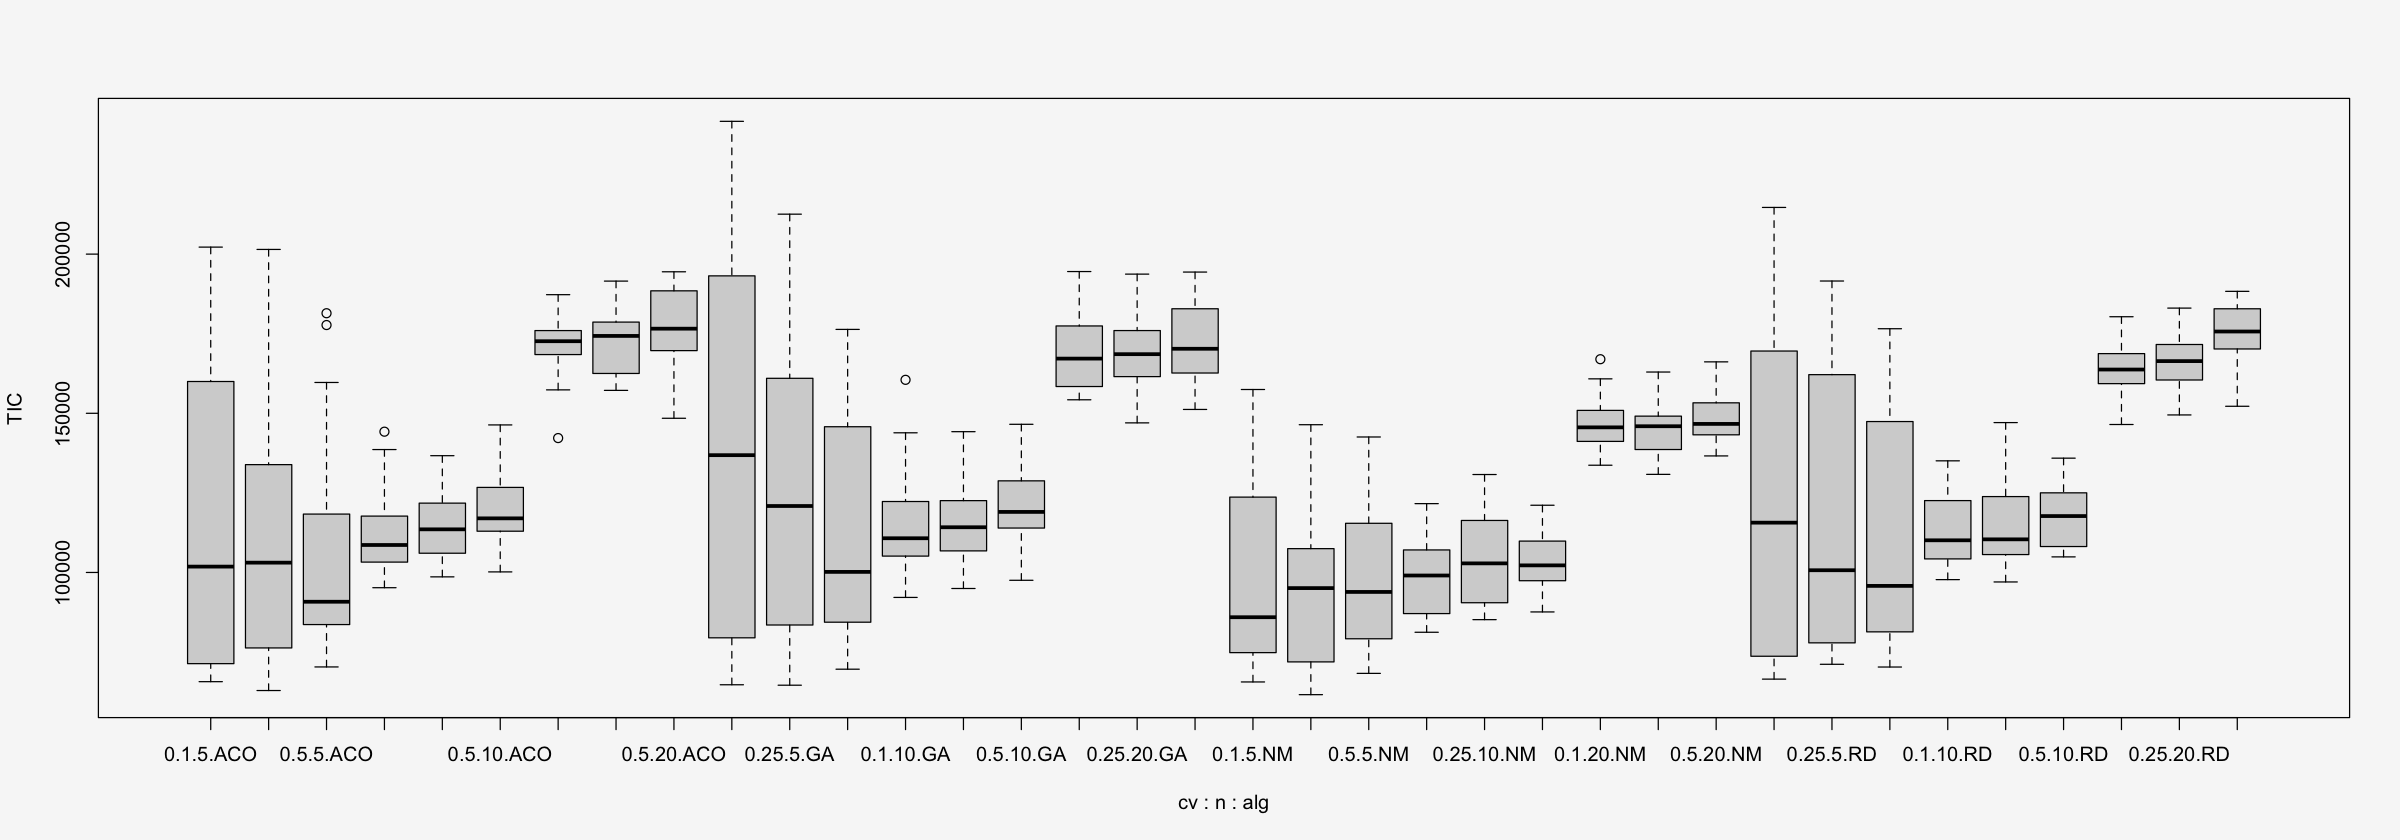

In [42]:
# Light gray background color
par(bg = "#f7f7f7")
boxplot(TIC~cv*n*alg)

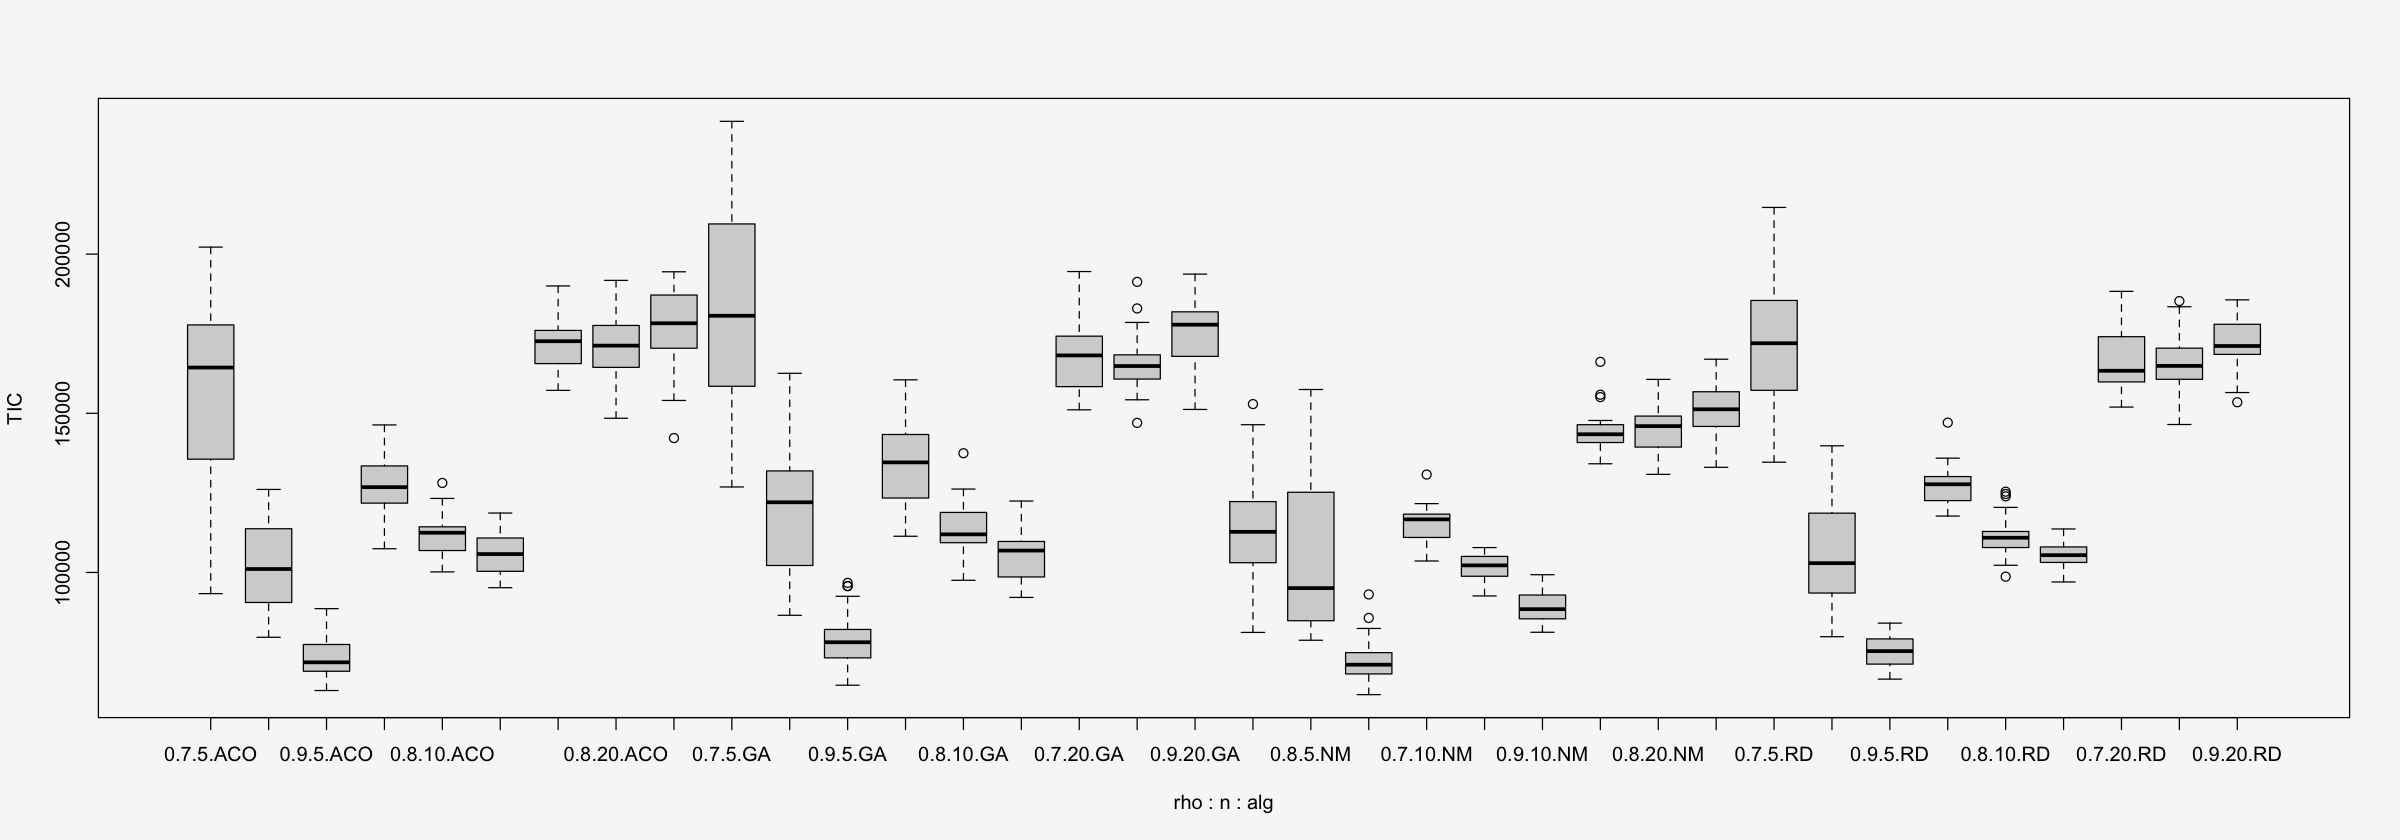

In [43]:
# Light gray background color
par(bg = "#f7f7f7")
boxplot(TIC~rho*n*alg)

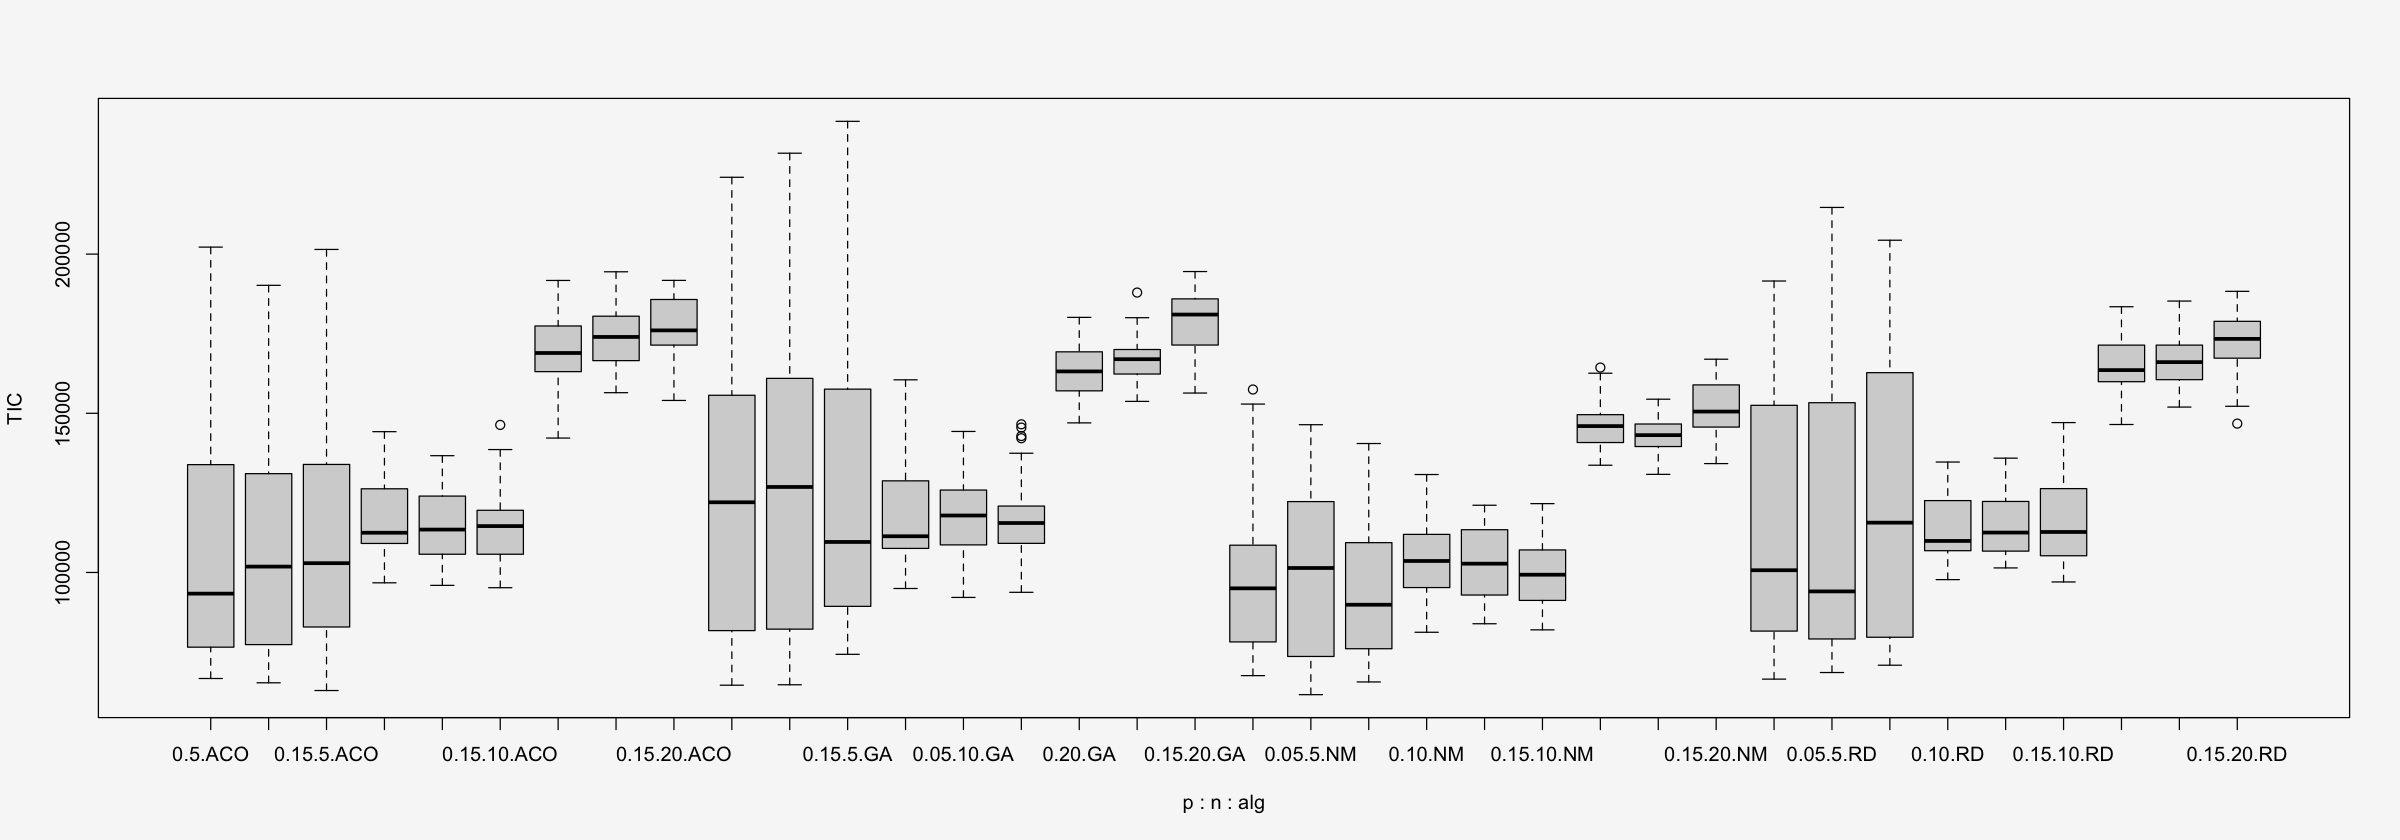

In [44]:
# Light gray background color
par(bg = "#f7f7f7")
boxplot(TIC~p*n*alg)

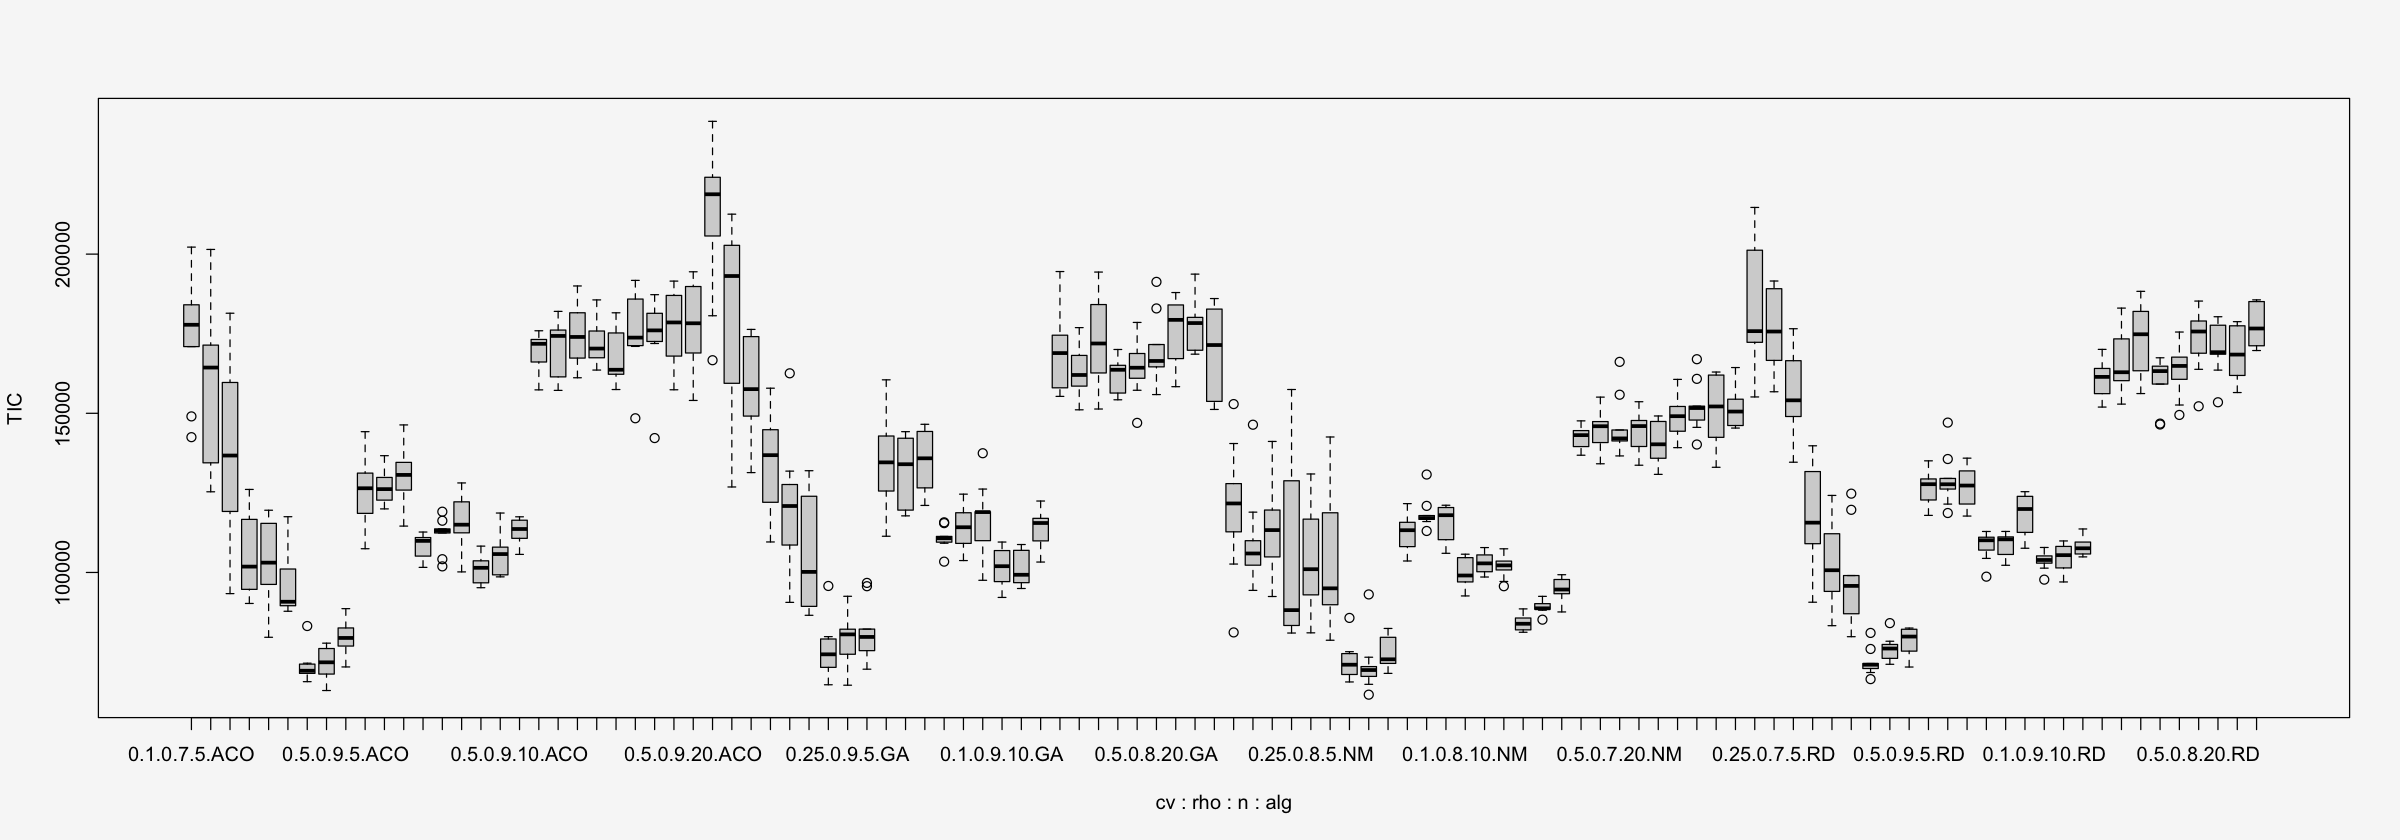

In [45]:
# Light gray background color
par(bg = "#f7f7f7")
boxplot(TIC~cv*rho*n*alg)

In [46]:
options(repr.plot.width=7)

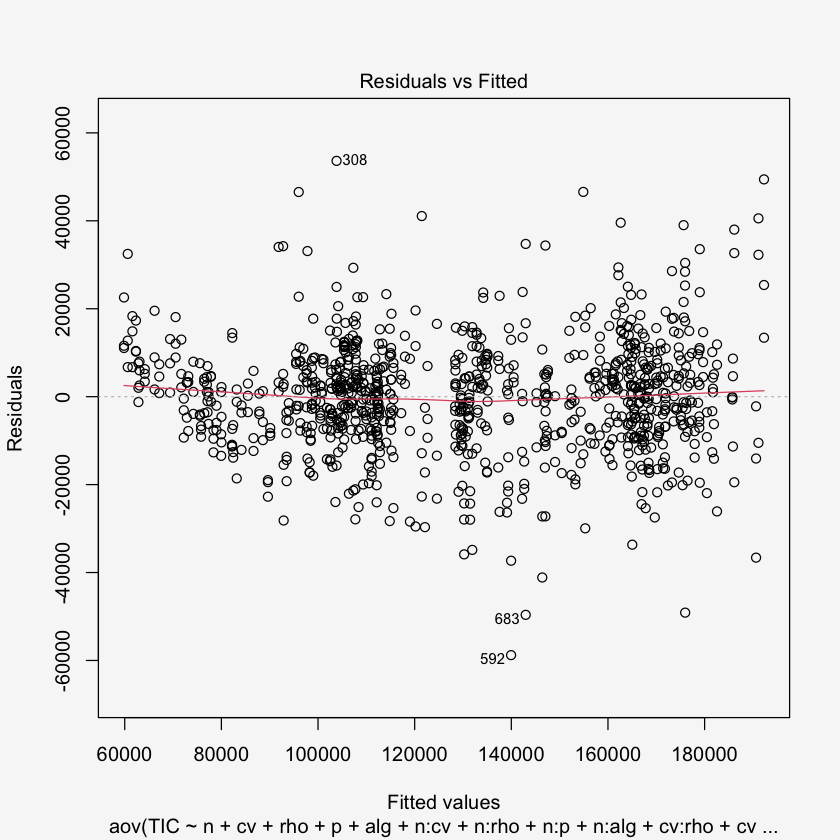

In [47]:
# Light gray background color
par(bg = "#f7f7f7")
plot(av, 1)

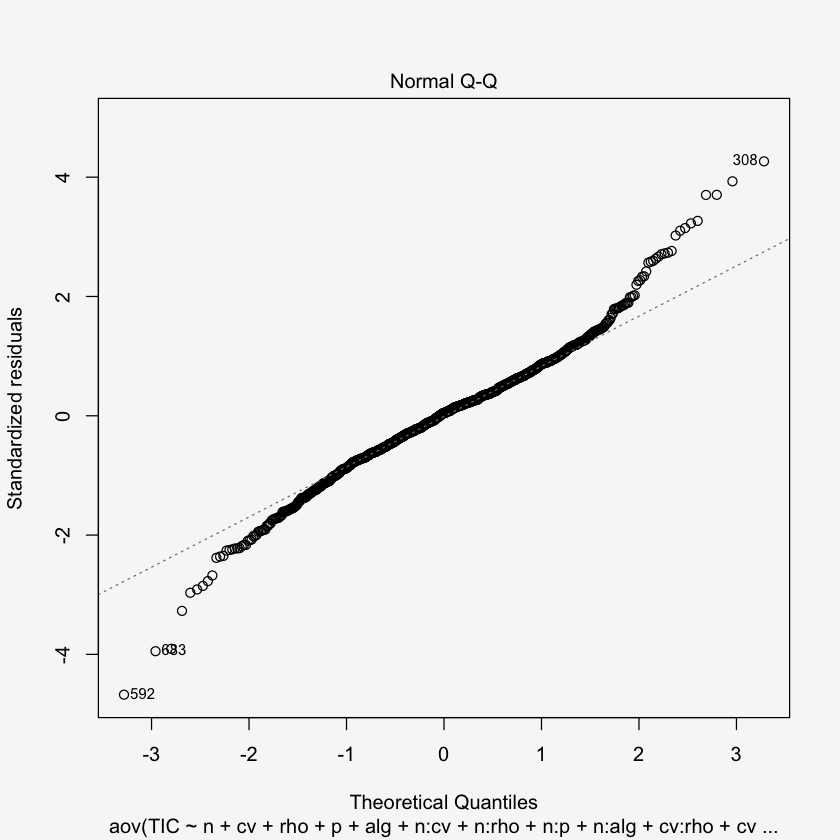

In [48]:
# Light gray background color
par(bg = "#f7f7f7")
plot(av,2)

### Análise apenas para n=5

In [89]:
tab2 <- subset(tab, n==5)
head(tab2)

,OrdemPad,OrdemEns,N,cv,rho,p,algorithm,Cost,SL,Smax,Smin
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,470,1,5,0.25,0.7,0.00,NM,152993.61,89.88,"[397.2654856684437, 575.7171241719723, 535.8452989787397, 1038.5008081180397, 660.4119425659904]","[221.6896732987889, 463.7362156871882, 441.47401004335796, 47.83355313504789, 646.3943394281191]"
7,465,7,5,0.10,0.9,0.15,RD,69559.86,99.35,"[580.8111166873379, 893.6899466541346, 365.2909660399011, 610.2987303625692, 376.2830265383861]","[509.30894571654954, 626.5782904729883, 129.76349794109484, 521.0509227984679, 332.9167157152452]"
14,861,14,5,0.50,0.9,0.15,RD,74637.79,99.27,"[882.2976514491081, 799.3376973098019, 479.1737272290495, 362.67567772722055, 363.16012352361935]","[623.2651786458105, 313.3929404417238, 424.38304517888116, 213.5424710201232, 273.79260189311424]"
19,139,19,5,0.10,0.9,0.05,GA,75214.50,99.73,"[871.29, 719.21, 434.5, 69.51, 87.87]","[680.185542465244, 708.226029428286, 130.73607084022254, 61.62233405837572, 65.7388655395834]"
22,503,22,5,0.25,0.9,0.15,GA,75987.55,99.31,"[8.63, 429.97, 893.82, 897.88, 819.14]","[3.02822497324049, 269.56136278167264, 241.86013529645442, 282.36342746327585, 689.9612958998841]"
24,458,24,5,0.10,0.9,0.00,NM,61480.54,99.04,"[515.0071413878777, 513.4793190766003, 417.31682936938597, 539.1285750918469, 465.5988205213163]","[186.5205170433235, 241.1438696867731, 319.7322107828665, 273.5499686104499, 302.8065976188563]"


In [90]:
TIC<-tab2$Cost
alg<-factor(tab2$algorithm)
cv<-factor(tab2$cv)
rho<-factor(tab2$rho)
p<-factor(tab2$p)

In [91]:
av<-aov(TIC~cv*rho*p*alg)
summary(av)

              Df    Sum Sq   Mean Sq F value   Pr(>F)    
cv             2 2.800e+10 1.400e+10  29.620 4.29e-12 ***
rho            2 5.023e+11 2.512e+11 531.443  < 2e-16 ***
p              2 3.330e+08 1.665e+08   0.352   0.7035    
alg            3 1.636e+10 5.453e+09  11.538 4.80e-07 ***
cv:rho         4 2.395e+10 5.988e+09  12.669 2.80e-09 ***
cv:p           4 2.971e+09 7.428e+08   1.572   0.1829    
rho:p          4 8.855e+08 2.214e+08   0.468   0.7589    
cv:alg         6 4.106e+09 6.844e+08   1.448   0.1976    
rho:alg        6 5.379e+09 8.965e+08   1.897   0.0826 .  
p:alg          6 1.547e+09 2.578e+08   0.546   0.7732    
cv:rho:p       8 3.614e+09 4.518e+08   0.956   0.4715    
cv:rho:alg    12 3.230e+09 2.692e+08   0.570   0.8653    
cv:p:alg      12 3.183e+09 2.653e+08   0.561   0.8715    
rho:p:alg     12 3.450e+09 2.875e+08   0.608   0.8340    
cv:rho:p:alg  24 8.409e+09 3.504e+08   0.741   0.8052    
Residuals    216 1.021e+11 4.726e+08                     
---
Signif. co

In [92]:
options(repr.plot.width=7)

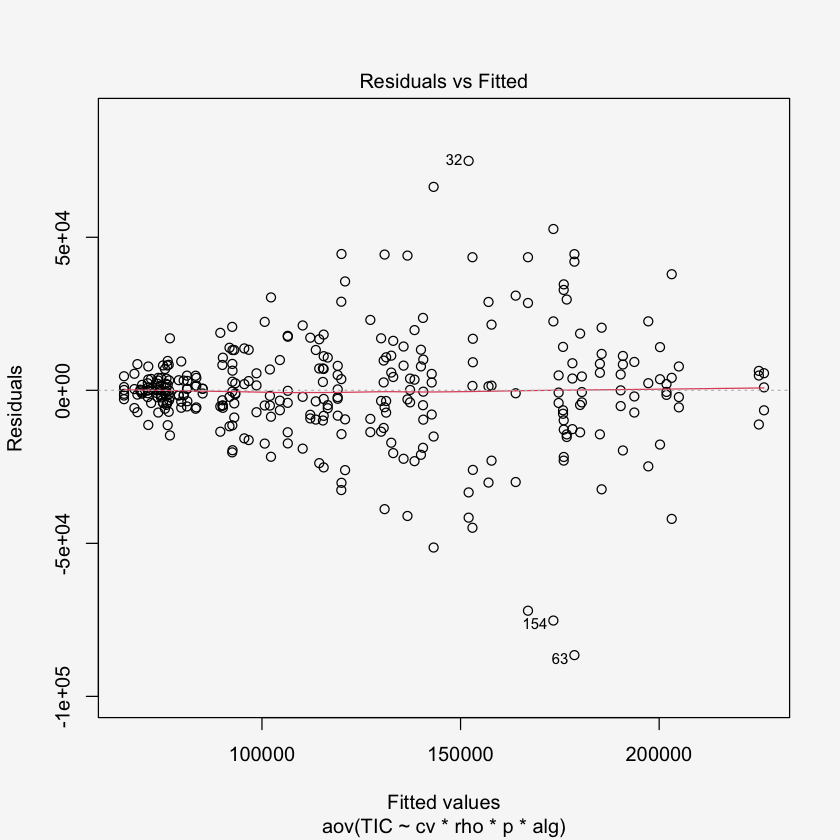

In [95]:
# Light gray background color
par(bg = "#f7f7f7")
plot(av,1)

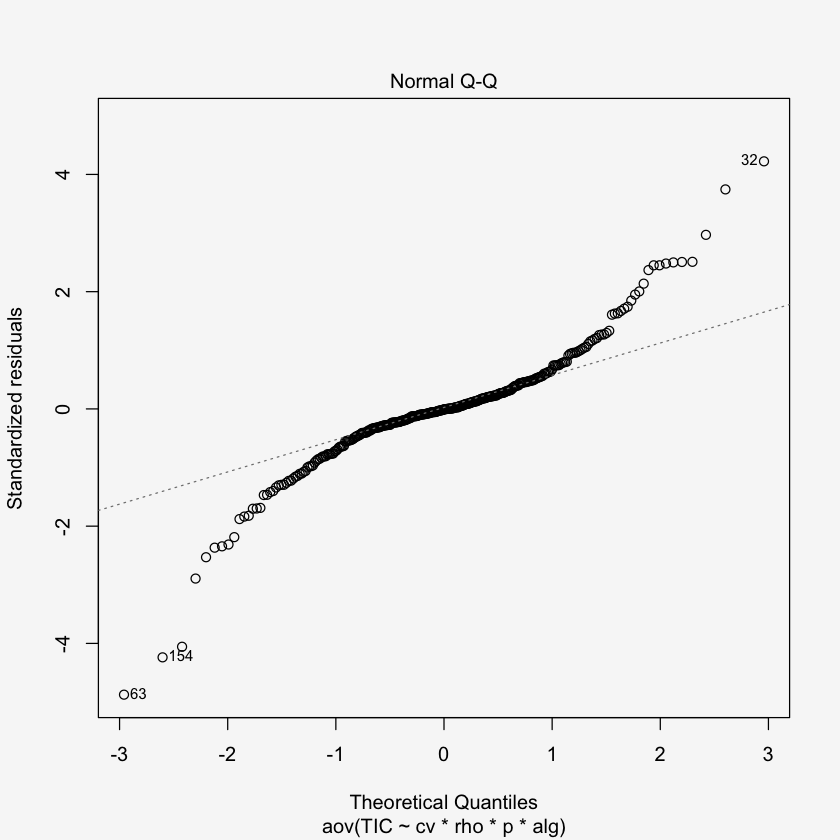

In [96]:
# Light gray background color
par(bg = "#f7f7f7")
plot(av,2)

In [97]:
options(repr.plot.width=10)

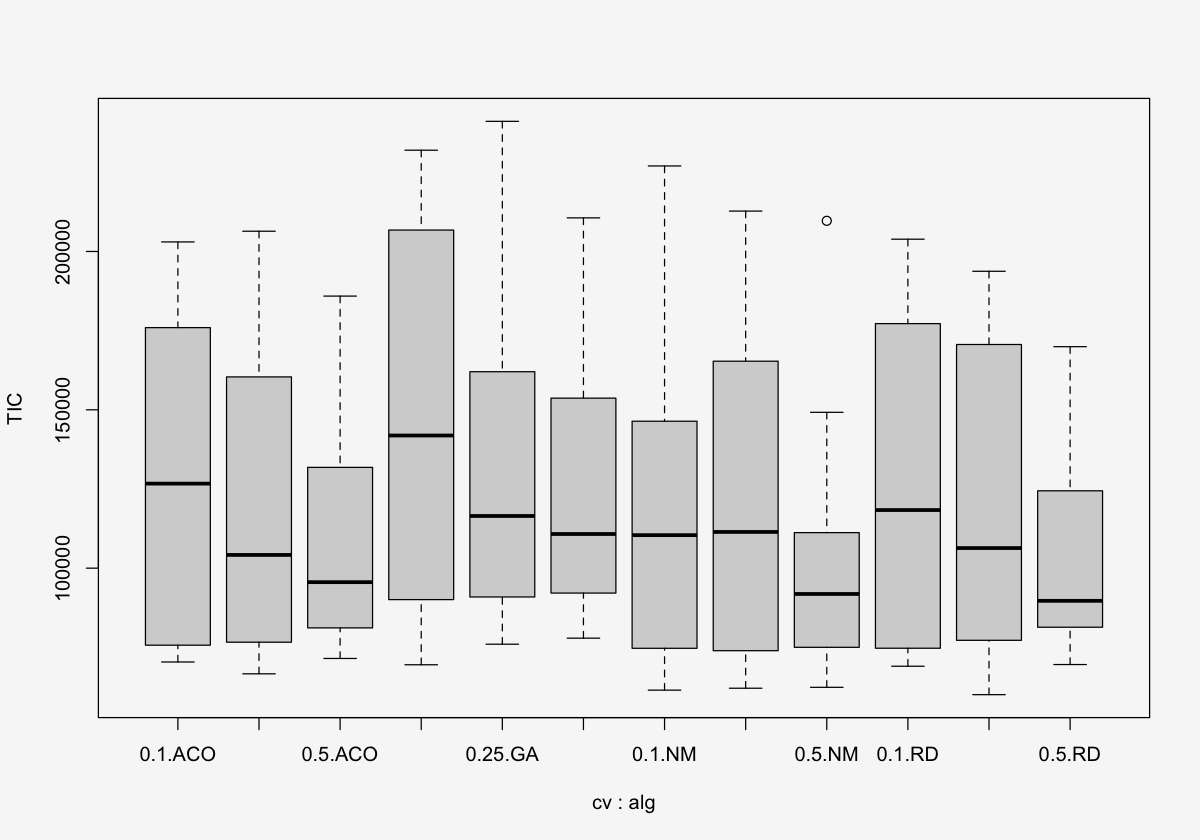

In [98]:
# Light gray background color
par(bg = "#f7f7f7")
boxplot(TIC~cv*alg)

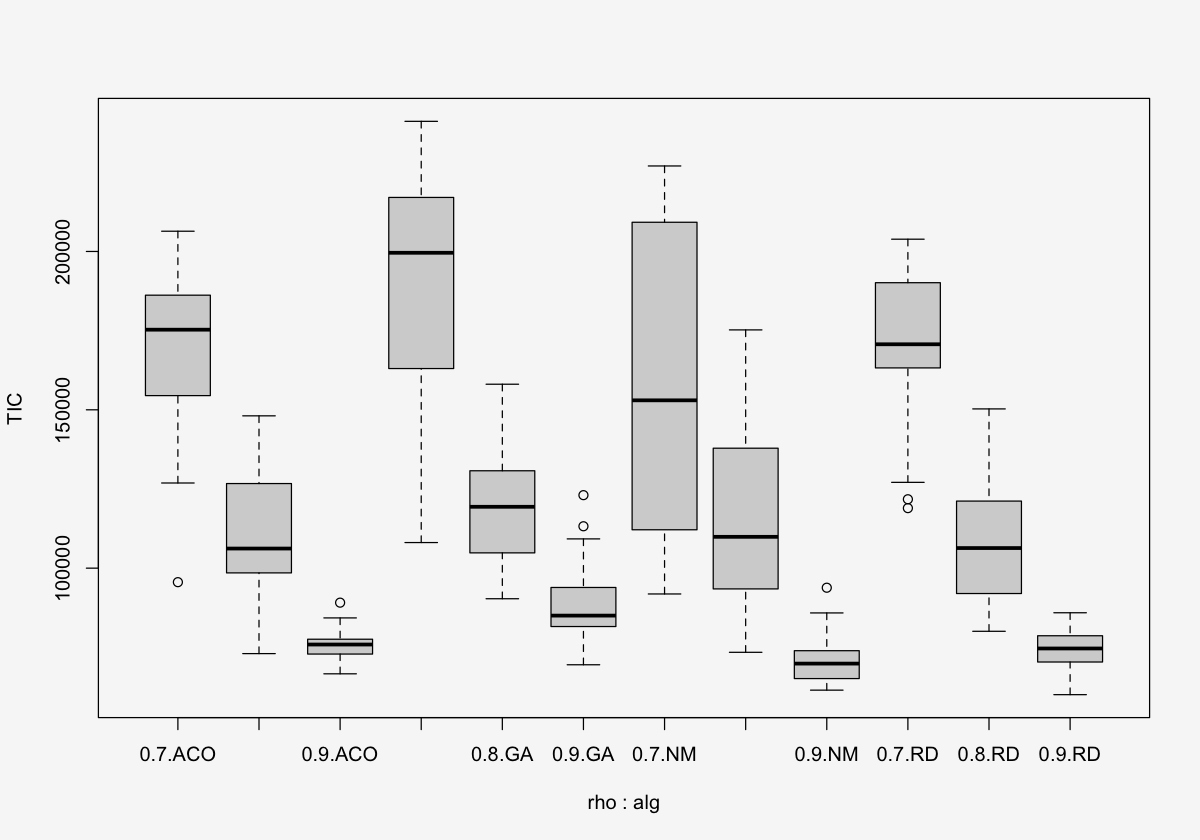

In [99]:
# Light gray background color
par(bg = "#f7f7f7")
boxplot(TIC~rho*alg)

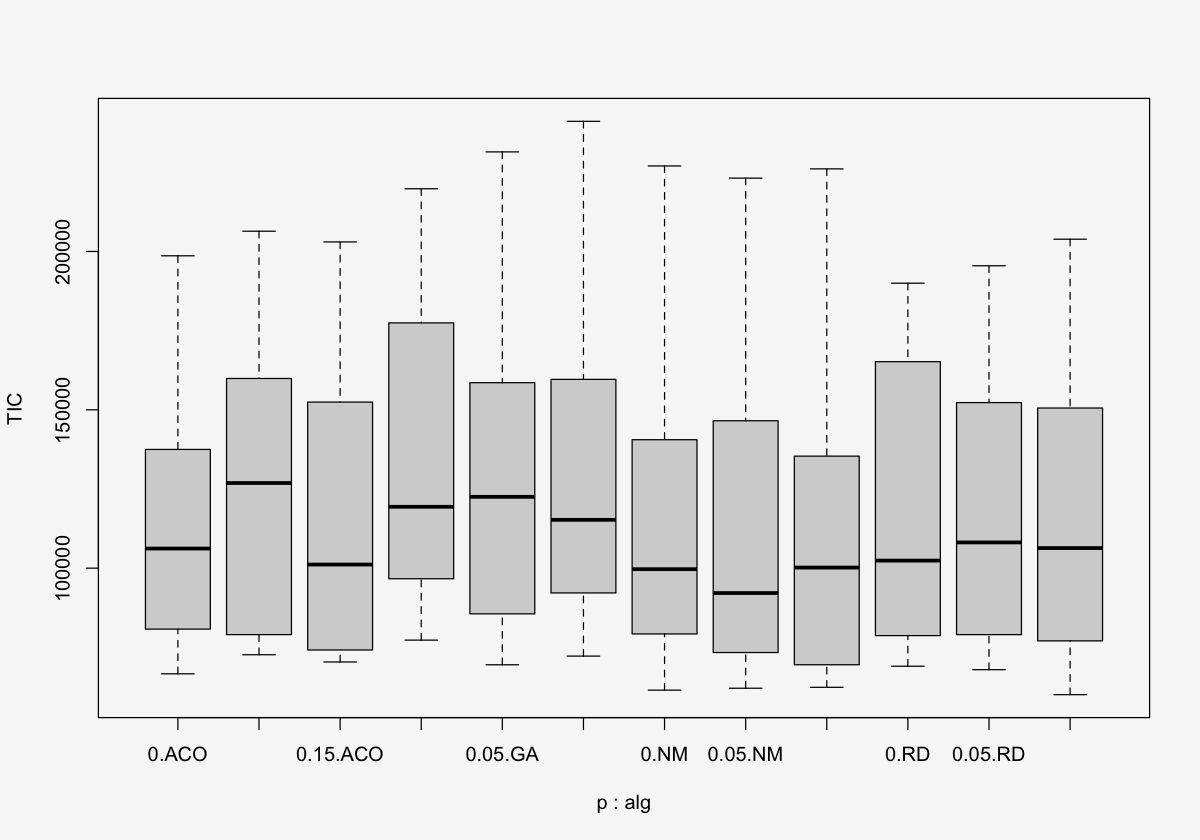

In [100]:
# Light gray background color
par(bg = "#f7f7f7")
boxplot(TIC~p*alg)

In [101]:
options(repr.plot.width=20)

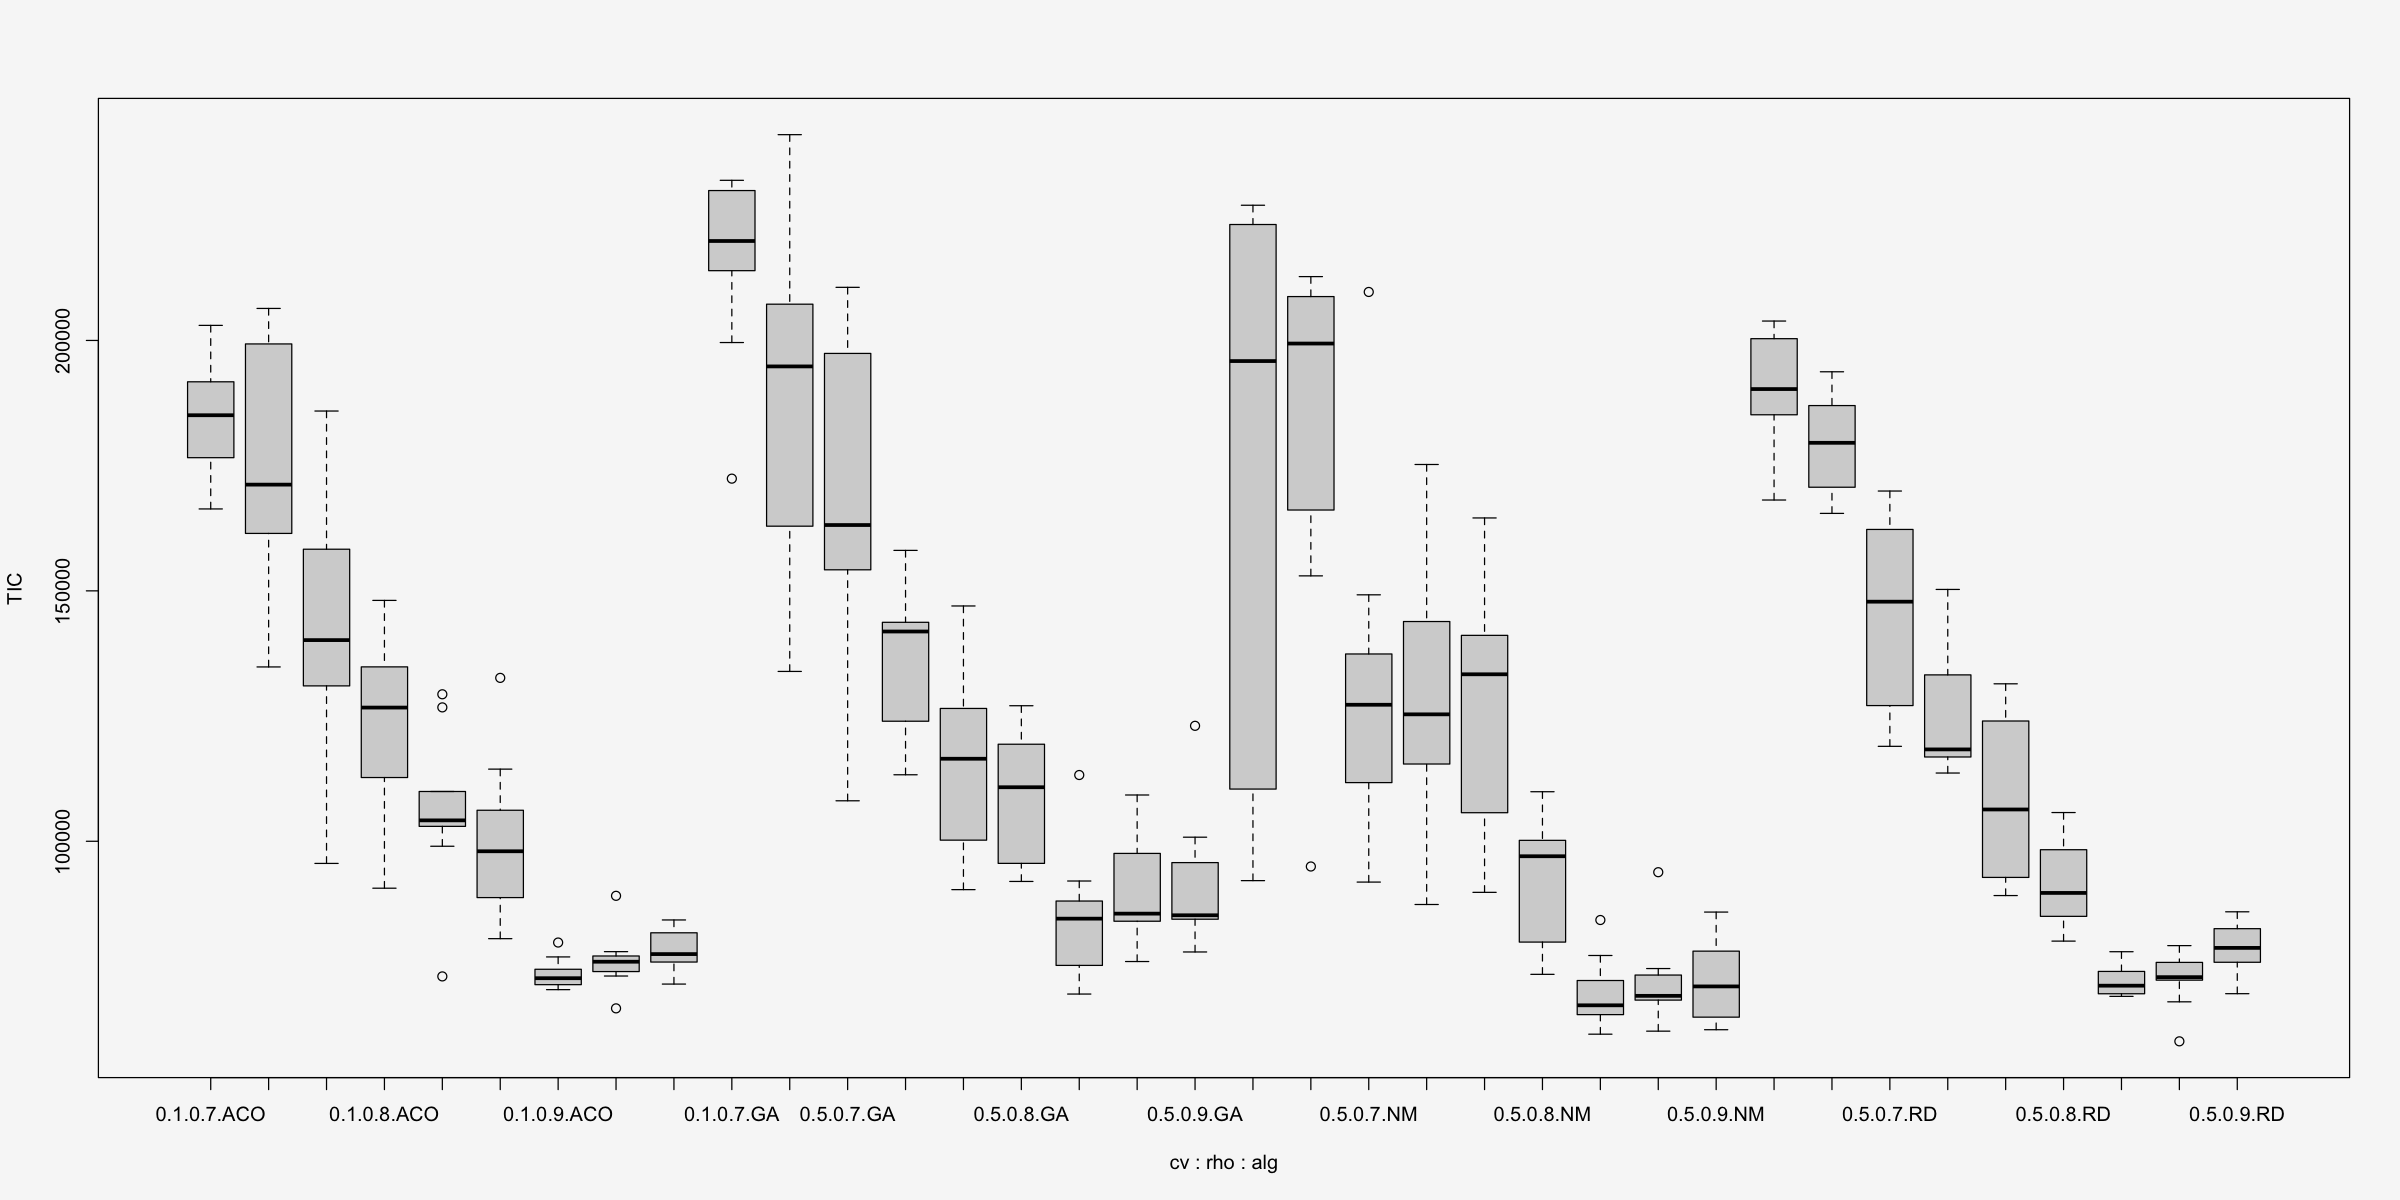

In [104]:
# Light gray background color
par(bg = "#f7f7f7")
boxplot(TIC~cv*rho*alg)